## EDA of Stock Prices during the Financial Crisis

In [ ]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border: 1px solid black;
    }
</style>

### Setting up the data from Yahoo Finance

In [ ]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2022, 1, 1)

In [ ]:
# Bank of America
BAC = data.DataReader('BAC', 'yahoo', start, end)
#Citi Group
C = data.DataReader('C', 'yahoo', start, end)
# JP Morgan
JPM = data.DataReader('JPM', 'yahoo', start, end)
# Morgan Stanley
MS = data.DataReader('MS', 'yahoo', start, end)
# Wells Fargo
WFC = data.DataReader('WFC', 'yahoo', start, end)

In [ ]:
# Concatenating all the data 
tickers = ["BAC", "JPM", "MS", "WFC", "C"]

bank_stocks = pd.concat([BAC, C, JPM, MS, WFC], axis = 1, keys = tickers)

bank_stocks.columns.names = ["Bank Ticker", "Stock Info"]

In [17]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                    JPM                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.364239  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.009903  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.052433  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.002808  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.024078  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker        WFC                                           C             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  34.886646  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  34.910576  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.006298  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.042202  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.413136  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  19.975800  
2006-01-04   31.799999  31.530001  10870000.0  19.744104  
2006-01-05   31.500000  31.495001  10158000.0  19.722189  
2006-01-06   31.580000  31.680000   8403800.0  19.838039  
2006-01-09   31.674999  31.674999   5619600.0  19.834904  

[5 rows x 30 columns]

### Max Close Price throughout the Period

In [ ]:
#for tick in tickers:
#    print(tick, bank_stocks[tick]['Close'].max())
    
bank_stocks.xs(key = 'Adj Close', axis= 1, level = 'Stock Info').max()

### Create a Return for each bank using pct_change()

In [ ]:
returns = pd.DataFrame()

for tick in tickers:
    returns [tick + ' Return'] = bank_stocks[tick]['Adj Close'].pct_change()

returns

In [ ]:
sns.pairplot(returns[1:])

### Best and Worst single day for each banks

In [20]:
returns.idxmin()   # Political change Obama inaguration

BAC Return   2009-01-20
JPM Return   2009-02-27
MS Return    2009-01-20
WFC Return   2008-10-09
C Return     2009-01-20
dtype: datetime64[ns]

In [21]:
returns.idxmax()

BAC Return   2009-04-09
JPM Return   2008-11-24
MS Return    2009-01-21
WFC Return   2008-10-13
C Return     2008-07-16
dtype: datetime64[ns]

### Calculate the Risk(sd)

In [22]:
returns.std()

BAC Return    0.031727
JPM Return    0.033543
MS Return     0.024607
WFC Return    0.032506
C Return      0.027134
dtype: float64

In [23]:
# Risk for specified time-period
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016174
JPM Return    0.015288
MS Return     0.014006
WFC Return    0.016287
C Return      0.012552
dtype: float64

### Return Distplot for each banks(2015)

<AxesSubplot:xlabel='MS Return', ylabel='Count'>

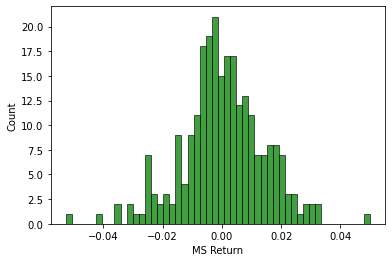

In [27]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], bins = 50, color= 'green')

<AxesSubplot:xlabel='C Return', ylabel='Count'>

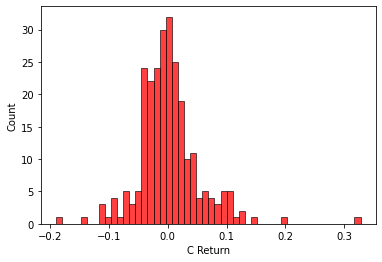

In [28]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], bins = 50, color = 'red')

### Line Plot of Close Price for Each Banks

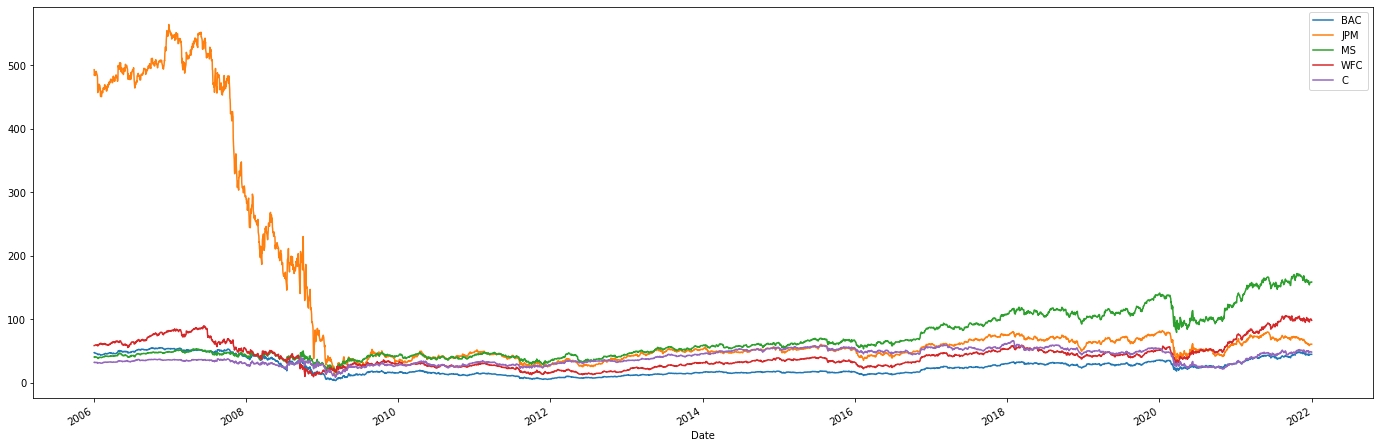

In [33]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label = tick, figsize = (24,8))
plt.legend()


#bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').plot()

### 100 Day Moving Average for BAC

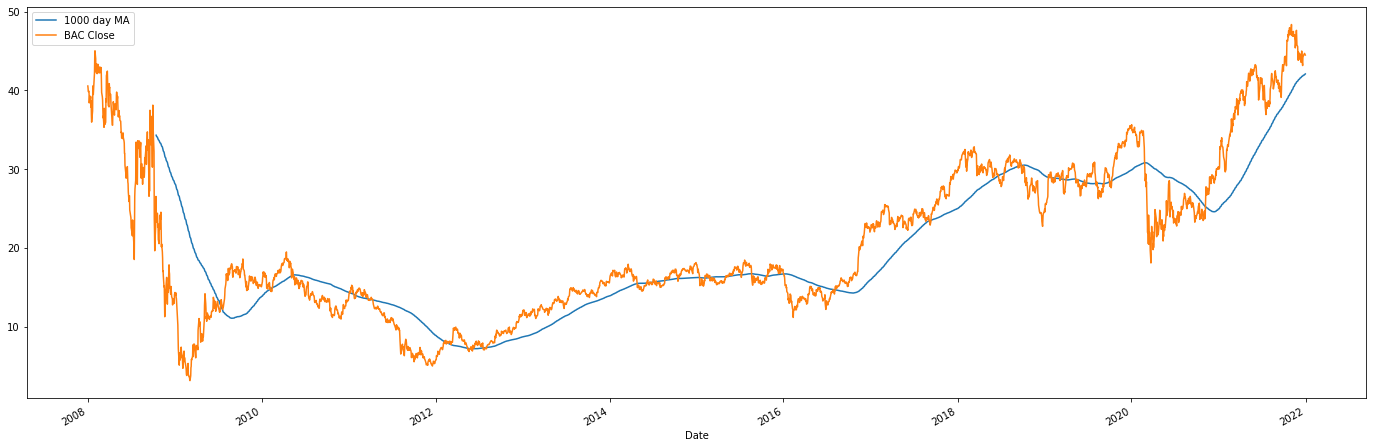

In [64]:
BAC['Close'].loc['2008-01-01':'2022-1-1'].rolling(window=200).mean().plot(label = '1000 day MA', figsize = (24,8))
BAC['Close'].loc['2008-01-01':'2022-1-1'].plot(label = 'BAC Close')
plt.legend()

### Correlation between the Stock Close Price

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

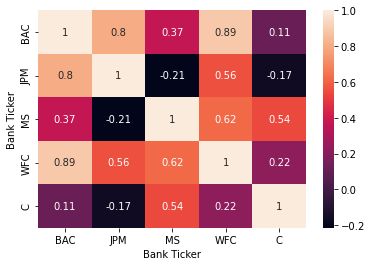

In [67]:
sns.heatmap(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True)

### Cluster Map to Cluster the Relationship

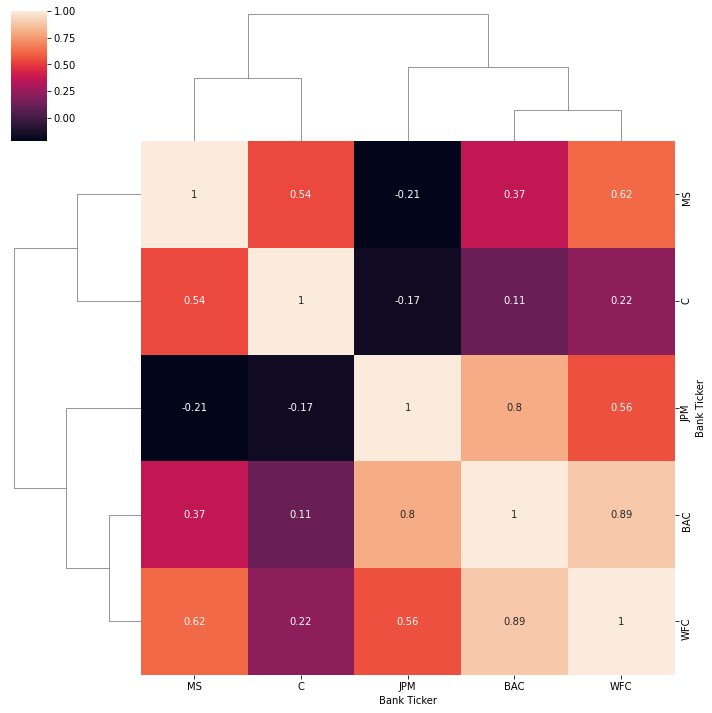

In [68]:
sns.clustermap(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True)